# Data science and Business Analytics Intern at SPARKS FOUNDATION

## Prediction using Supervised ML using Python

## Problem: Predict the percentage of an student based on the no. of study hours. 

## Author : Manisha Tanwar

In [1]:
# Importing all libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

####  Importing and reading dataset 

In [7]:
url = pd.read_csv("https://raw.githubusercontent.com/manisha3363/manisha3363/main/Score.csv")
print("Data imported successfully")

url.head(30)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. 

In [8]:
url.shape

(25, 2)

The dataset contains 25 rows with 2 columns,i.e. hours and scores

In [9]:
url.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Vizualization using Scatter Plot 

Let's scatter plot our data points on graph and try to manually find any relationship between the data of hour and score

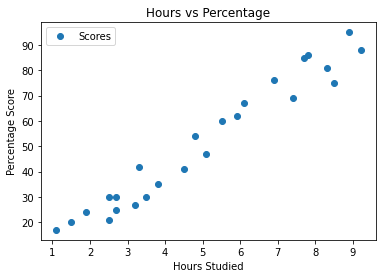

In [11]:
url.plot(x='Hours', y='Scores', style='o')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.title('Hours vs Percentage')  
plt.show()

In [12]:
url.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can see that variables are possitively correlated to one other and a linear relationship exists between them.

### Splitting the Dataset

In [13]:
x = url.iloc[:,:-1].values  
y = url.iloc[:,1].values

### Splitting the Dataset into training and test sets. 

We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

### Training the Algorithm usng Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Score:",regressor.score(x_train, y_train) )
print("Training complete.")

Score: 0.9515510725211552
Training complete.


### Plotting the regression line

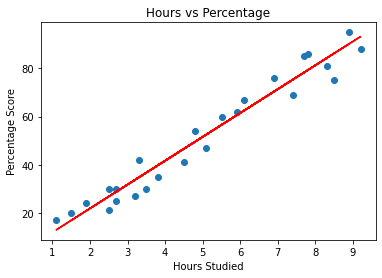

In [16]:
m = regressor.coef_
c = regressor.intercept_

#Equation of line
line = m*x+c

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,"r")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.title('Hours vs Percentage')  
plt.show()

### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
print("Testing data - In Hours\n",x_test) 
# Predicting the scores
y_pred = regressor.predict(x_test)

Testing data - In Hours
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
print("Prediscted y:\n",y_pred)

Prediscted y:
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Comparing Actual vs Predicted

In [19]:
url = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
url

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Prdecting dat afor hours = 9.25 hours/day

In [20]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours],])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


If a student studies for 9.25 hours/day, Linear regression predicts that the student will score 93.69%

### Evaluating the model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Accuaracy:',regressor.score(x_test,y_test)*100,"%")

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Accuaracy: 94.54906892105356 %
